# Метод Ньютона и Дихотамии

1. Реализовать **метод Ньютона** с конфигурациями:
    - С точностью ```E = 0.1```
    - С точностью ```E = 0.01```
    - С учетом кратности корня
2. Реализовать **метод Дихотамии** с конфигурациями:
    - С точностью ```E = 0.1```
    - С точностью ```E = 0.01```


В качестве примера взять функцию ```(x - 1)(x - 2)^2(x - 3)^3 = 0```

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'Y')

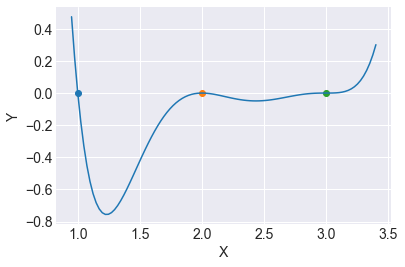

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%pylab inline
plt.style.use('seaborn-dark')
plt.rc('font', size=14)

import warnings
warnings.filterwarnings("ignore")


def func(x):
    return (x - 1) * (x - 2)**2 * (x - 3)**3

x = np.linspace(0.95, 3.4, 100)
fig = plt.figure()
plt.plot(x, [func(num) for num in x])
plt.scatter(1, 0)
plt.scatter(2, 0)
plt.scatter(3, 0)
plt.grid(lw=1)
plt.xlabel('X')
plt.ylabel('Y')

In [2]:
def derivative(f, x, dx):
    return (f(x+dx) - f(x-dx))/(2*dx)

## 1. Метод Ньютона

In [3]:
def nuton_simple(f, x0, EPS=1e-6, xn=None, x=0):
    t, t0, tn = x, x0, xn
    
    count = 0
    while count < 100:
        
        try:
            xn = x0 - f(x0) / derivative(f, x0, 0.0001)
            count += 1
        except ZeroDivisionError as e:
            return None
        
        q = (xn - x0) / (x0 - x)
        if abs((xn - x0)/(1 - q)) < EPS:            
            p = 1 / (1 - q)
            solver = lambda x: f(x) / (abs(x - xn))**(p)
            ans = nuton_simple(solver, t0, EPS, tn, t)
            if ans is not None:
                res = [t for t in ans]
                res.append([xn, p, count])
                return  res
            else:
                return [[xn, p, count],]
        
        else:
            x, x0 = x0, xn
    
    return None

EPS = 0.01
res = nuton_simple(func, 5, EPS)
pd.DataFrame(res, index=range(len(res)), columns=['Корнь', 'Кратность', 'Итерации'])

,Корнь,Кратность,Итерации
0,1.000000,1.000460,4
1,2.004311,2.025970,8
2,3.004922,3.045346,18


In [4]:
EPS = 0.1
res = nuton_simple(func, 5, EPS)
pd.DataFrame(res, index=range(len(res)), columns=['Корнь', 'Кратность', 'Итерации'])

,Корнь,Кратность,Итерации
0,2.027149,2.180466,11
1,3.052913,3.430314,12


## 2. Метод Дихотамии

Text(0, 0.5, 'Y')

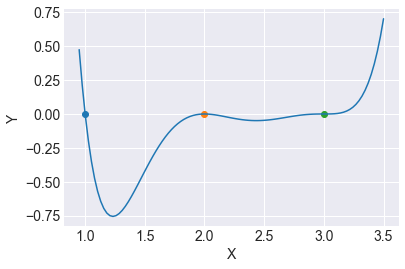

In [5]:
x = np.linspace(0.95, 3.5, 100)
fig = plt.figure()
plt.plot(x, [func(num) for num in x])
plt.scatter(1, 0)
plt.scatter(2, 0)
plt.scatter(3, 0)
plt.grid(lw=1)
plt.xlabel('X')
plt.ylabel('Y')

In [6]:
def dehotami_simple(f, x1, x2, EPS=0.1):
    t1, t2, = x1, x2
    
    count = 0
    while count < 100:
        count += 1
        x = (x1 + x2) / 2
        
        if abs(x1 - x2) < 2*EPS:
            solver = lambda val: f(val) / (val - x)
            ans = dehotami_simple(solver, t1, t2, EPS)
            
            if ans is not None:
                res = [t for t in ans]
                res.append([x, count])
                return res
            else:
                return [[x, count],]
        
        if f(x1)*f(x) <= 0:
            x2 = x
        elif f(x2)*f(x) <=0 :
            x1 = x
        else:
            tmp = np.random.random()*(x2-x1) + x1
            if f(tmp)*f(x1) <= 0:
                x2 = tmp
            elif f(tmp)*f(x2) <= 0:
                x1 = tmp
            
    return None

EPS = 0.01
res = dehotami_simple(func, -1, 4, EPS)
pd.DataFrame(res, index=range(len(res)), columns=['Корнь', 'Итерации'])

,Корнь,Итерации
0,2.994141,9
1,1.001953,9


In [7]:
EPS = 0.001
res = dehotami_simple(func, -1, 4, EPS)
pd.DataFrame(res, index=range(len(res)), columns=['Корнь', 'Итерации'])

,Корнь,Итерации
0,2.999634,13
1,1.000122,13
